 **Load and Preprocess the Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
netflix_dataset = pd.read_csv("netflix_titles.csv")
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


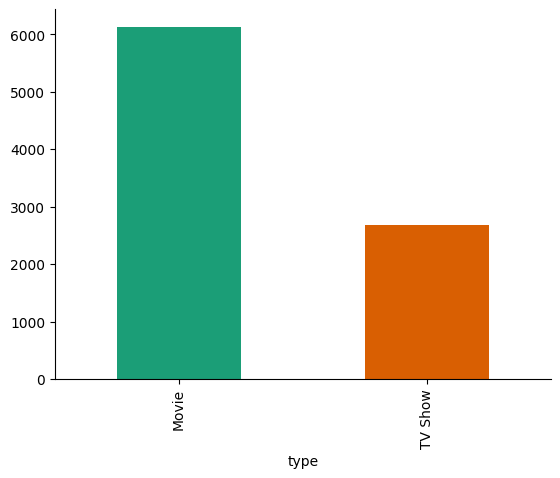

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
netflix_dataset.groupby('type').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_dataset.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


**K-Means Clustering for Item Segmentation**

In [ ]:
netflix_clean = netflix_dataset.drop(['show_id', 'title', 'director', 'cast', 'description', 'date_added'], axis=1)
netflix_clean['country'].fillna('Unknown', inplace=True)
netflix_clean['rating'].fillna('Unknown', inplace=True)
netflix_clean['duration'].fillna('Unknown', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
netflix_clean['type'] = label_encoder.fit_transform(netflix_clean['type'])  # 0 for Movie, 1 for TV Show
netflix_clean['country'] = label_encoder.fit_transform(netflix_clean['country'])
netflix_clean['rating'] = label_encoder.fit_transform(netflix_clean['rating'])
netflix_clean['listed_in'] = label_encoder.fit_transform(netflix_clean['listed_in'])

In [ ]:
def parse_duration(duration):
    if 'Season' in duration:
        return int(duration.split()[0]) * 60  # Approximate season length to 60 minutes
    elif 'min' in duration:
        return int(duration.split()[0].replace(' min', ''))
    else:
        return 0  # Handle 'Unknown' duration

In [ ]:
netflix_clean['duration'] = netflix_clean['duration'].apply(parse_duration)

In [ ]:
# Select features for clustering
X_items = netflix_clean[['release_year', 'duration', 'rating']]

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_items_scaled = scaler.fit_transform(X_items)

In [ ]:
from sklearn.cluster import KMeans
# Apply KMeans for item segmentation (e.g., with 3 clusters)
kmeans_items = KMeans(n_clusters=3, random_state=42)
netflix_clean['item_cluster'] = kmeans_items.fit_predict(X_items_scaled)

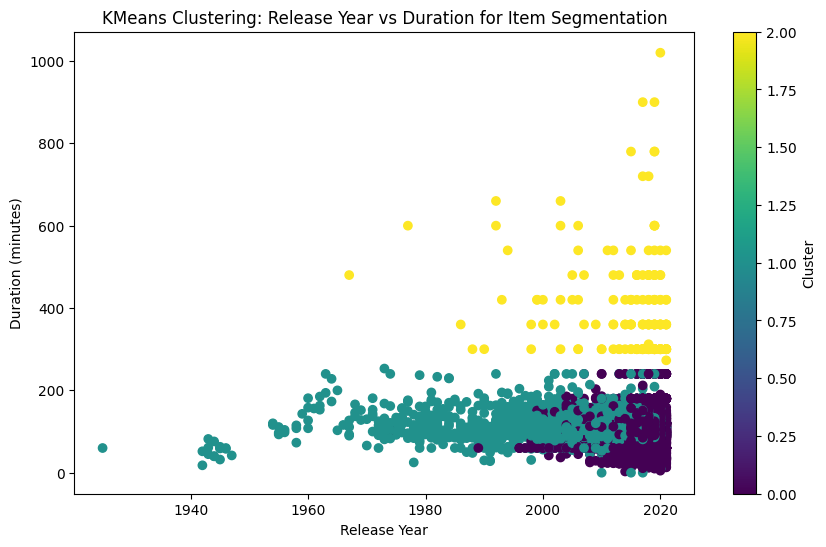

In [ ]:
# Visualize item clusters
plt.figure(figsize=(10, 6))
plt.scatter(netflix_clean['release_year'], netflix_clean['duration'], c=netflix_clean['item_cluster'], cmap='viridis')
plt.title('KMeans Clustering: Release Year vs Duration for Item Segmentation')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Check the assigned clusters for the items
print(netflix_clean[['release_year', 'duration', 'rating', 'item_cluster']].head())

   release_year  duration  rating  item_cluster
0          2020        90       7             1
1          2021       120      11             0
2          2021        60      11             0
3          2021        60      11             0
4          2021       120      11             0


Choose the number of clusters using the elbow method

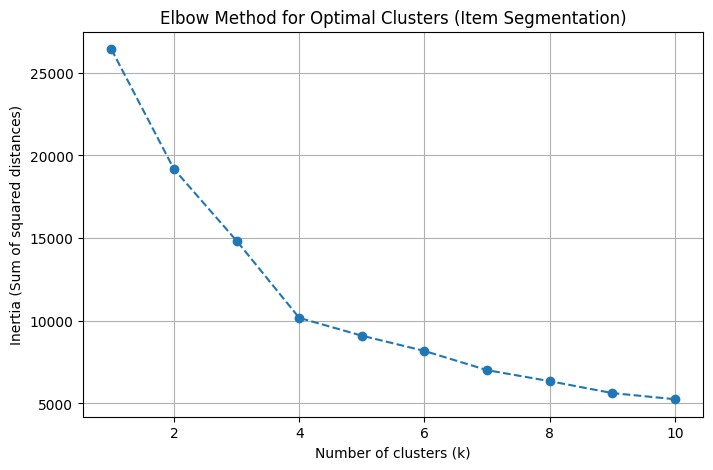

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)  # Test cluster sizes from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_items_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters (Item Segmentation)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()


**K-Means Clustering for User Segmentation**

In [ ]:
# Simulate user interaction data
# Creating a DataFrame to simulate user preferences for 'listed_in', 'country', and 'rating'
num_users = 100  # Simulate 100 users
np.random.seed(42)  # For reproducibility

In [ ]:
# Simulating user preferences for 'listed_in' (genres), 'country', and 'rating'
user_preferences = pd.DataFrame({
    'preferred_genre': np.random.choice(netflix_clean['listed_in'].unique(), num_users),
    'preferred_country': np.random.choice(netflix_clean['country'].unique(), num_users),
    'preferred_rating': np.random.choice(netflix_clean['rating'].unique(), num_users)
})

In [ ]:
# Encode the simulated user data
user_preferences['preferred_genre'] = label_encoder.fit_transform(user_preferences['preferred_genre'])
user_preferences['preferred_country'] = label_encoder.fit_transform(user_preferences['preferred_country'])
user_preferences['preferred_rating'] = label_encoder.fit_transform(user_preferences['preferred_rating'])

In [ ]:
# Select features for clustering users
X_users = user_preferences[['preferred_genre', 'preferred_country', 'preferred_rating']]

In [ ]:
# Apply KMeans for user segmentation (e.g., with 3 clusters)
kmeans_users = KMeans(n_clusters=3, random_state=42)
user_preferences['user_cluster'] = kmeans_users.fit_predict(X_users)

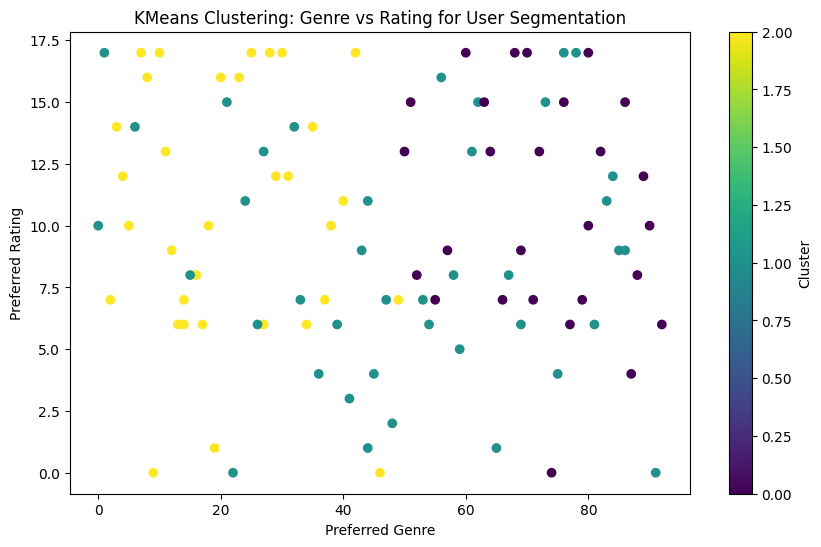

In [ ]:
# Visualize user clusters
plt.figure(figsize=(10, 6))
plt.scatter(user_preferences['preferred_genre'], user_preferences['preferred_rating'], c=user_preferences['user_cluster'], cmap='viridis')
plt.title('KMeans Clustering: Genre vs Rating for User Segmentation')
plt.xlabel('Preferred Genre')
plt.ylabel('Preferred Rating')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Check the assigned clusters for the users
print(user_preferences[['preferred_genre', 'preferred_country', 'preferred_rating', 'user_cluster']].head())

   preferred_genre  preferred_country  preferred_rating  user_cluster
0               85                 13                 9             1
1               87                 44                 4             0
2               86                 68                15             0
3               61                 31                13             1
4               31                 77                12             2


Choose the number of clusters using the elbow method

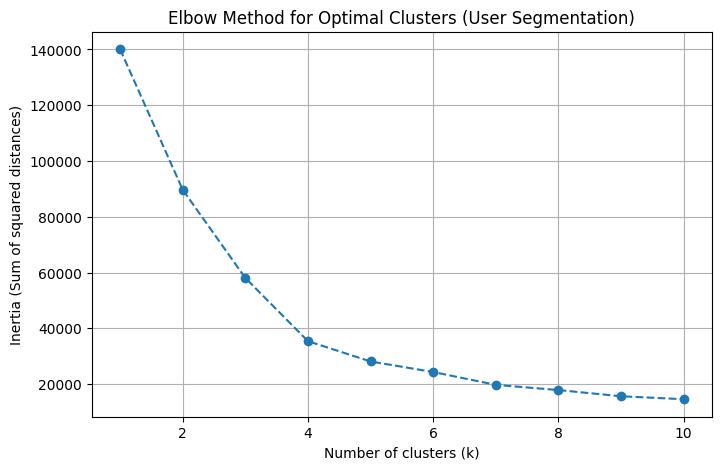

In [ ]:
# Apply the Elbow Method to find the optimal number of clusters for users
inertia_users = []
K_range_users = range(1, 11)  # Test cluster sizes from 1 to 10

for k in K_range_users:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_users)
    inertia_users.append(kmeans.inertia_)

# Plot the Elbow Curve for user clustering
plt.figure(figsize=(8, 5))
plt.plot(K_range_users, inertia_users, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters (User Segmentation)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

**Collaborative Filtering**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
# Simulate a user-item interaction matrix (rows: users, columns: items, values: ratings)
# For simplicity, let's create a random interaction matrix with ratings between 1-5
user_item_matrix = np.random.randint(1, 6, size=(num_users, len(netflix_clean)))

In [ ]:
# Compute similarity between users using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

In [ ]:
# Recommend items for a target user based on similar users' preferences
target_user = 0
similar_users = np.argsort(user_similarity[target_user])[::-1]  # Most similar users
similar_users = similar_users[similar_users != target_user]  # Exclude the target user

# Create a dictionary to hold the item recommendations and their scores
item_scores = {}

# Aggregate scores for items from similar users
for similar_user in similar_users:
    for item_id in range(len(netflix_clean)):
        if user_item_matrix[similar_user, item_id] > 0:  # If the similar user rated this item
            if item_id in item_scores:
                item_scores[item_id] += user_item_matrix[similar_user, item_id] * user_similarity[target_user, similar_user]
            else:
                item_scores[item_id] = user_item_matrix[similar_user, item_id] * user_similarity[target_user, similar_user]

# Sort the items by their aggregated scores in descending order
recommended_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)

# Display the top recommended items for the target user
print(f"\nTop recommendations for User {target_user}:")
for item_id, score in recommended_items[:5]:  # Show top 5 recommendations
    print(f"Item ID: {item_id}, Score: {score:.2f}")


Top recommendations for User 0:
Item ID: 5237, Score: 287.81
Item ID: 8275, Score: 285.34
Item ID: 2950, Score: 283.71
Item ID: 5907, Score: 281.25
Item ID: 6986, Score: 279.62


**KNeighborsClassifier**

In [ ]:
from sklearn.model_selection import train_test_split

# Assume `netflix_clean` is the cleaned dataset with item clusters.
X = netflix_clean[['release_year', 'duration', 'rating']]  # Features
y = netflix_clean['type']  # Target variable (e.g., Movie/TV Show)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**KNN Using Rule of thumb**

In [ ]:
n_samples = X_train.shape[0]
k_value = int(np.sqrt(n_samples))

# Step 3: Ensure k is an odd number (round up if necessary)
if k_value % 2 == 0:
    k_value += 1

print(f"Using k={k_value} based on the rule of thumb (square root of dataset size)")

# Step 4: Train KNN model using the calculated k
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with k={k_value}: {accuracy:.4f}")

Using k=83 based on the rule of thumb (square root of dataset size)
Accuracy with k=83: 0.9648


In [ ]:
# Calculate metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [ ]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Accuracy: 96.48%
Precision: 95.06%
Recall: 97.15%
F1 Score: 95.99%


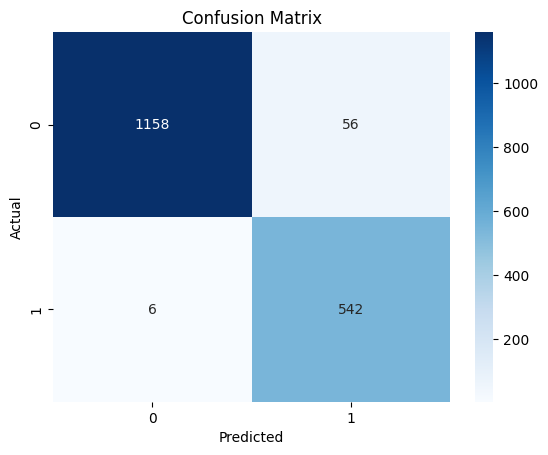

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()